# 컴퓨터 비전 예제 및 실습

이 노트북은 **`객체 탐지`, `OCR` 기초 예제 실습**을 수행하는 노트북입니다.

✅ 내용  
1. YOLO를 활용한 이미지 객체 탐지 예제
2. YOLO를 활용한 영상 객체 탐지 예제
3. EasyOCR을 활용한 OCR 예제

In [ ]:
%conda env create -f computer_vision.yaml -n computer_vision

### YOLO를 활용한 객체 탐지 예제

사전 학습된 YOLOv8 nano 모델(`yolov8n.pt`)을 사용하여 웹상의 이미지에서 실시간 객체 탐지를 수행합니다.

Ultralytics의 YOLO를 통해 간단하게 객체를 인식하고, 탐지된 객체들을 바운딩 박스와 클래스 라벨로 시각화합니다.

* Ultralytics YOLO 및 PIL 이미지 처리 라이브러리 임포트
* 사전 학습된 YOLOv8 nano 모델 로드
* 웹 URL 이미지(zidane.jpg)에서 객체 탐지 수행 및 BGR→RGB 변환 후 Jupyter에서 시각화
* 두 번째 웹 이미지(bus.jpg)에서 동일한 객체 탐지 프로세스 반복 실행

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\SSAFY\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:01<00:00, 4.84MB/s]


100%|██████████| 49.2k/49.2k [00:00<00:00, 3.34MB/s]


image 1/1 c:\Users\SSAFY\Desktop\AI_\zidane.jpg: 384x640 2 persons, 1 tie, 40.5ms
Speed: 1.6ms preprocess, 40.5ms inference, 80.2ms postprocess per image at shape (1, 3, 384, 640)


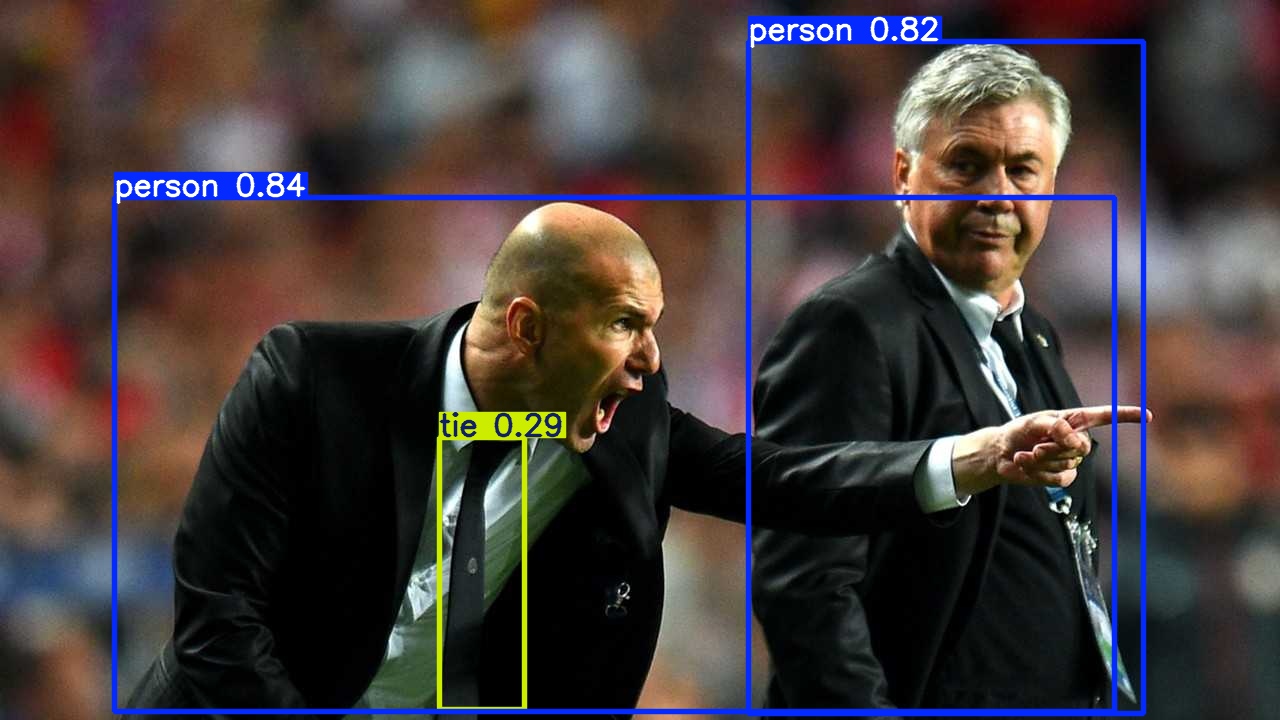

100%|██████████| 134k/134k [00:00<00:00, 3.22MB/s]

image 1/1 c:\Users\SSAFY\Desktop\AI_\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 53.2ms
Speed: 3.6ms preprocess, 53.2ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 480)


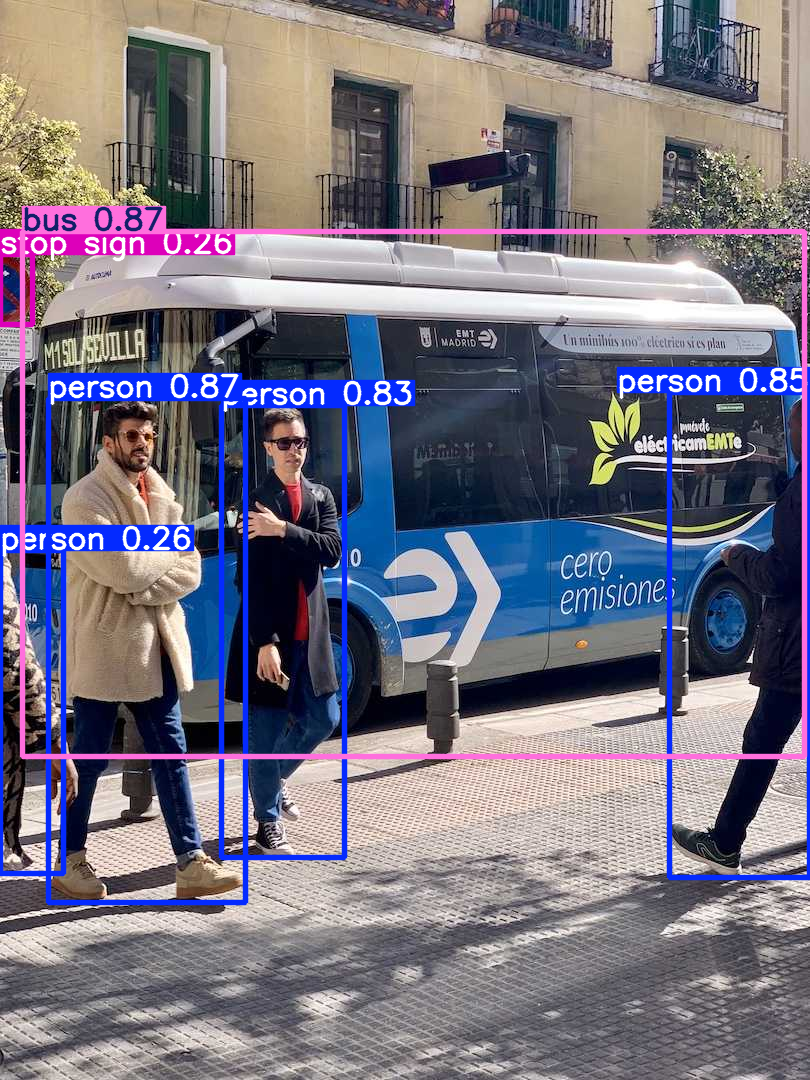

In [ ]:
# ─────────────────────────────────────────────────────────────
# 1) 라이브러리 임포트
# ─────────────────────────────────────────────────────────────
from ultralytics import YOLO    # Ultralytics YOLO 모델 로딩·추론용
from PIL import Image           # NumPy 배열을 이미지로 변환하기 위한 PIL

# ─────────────────────────────────────────────────────────────
# 2) YOLOv8n 모델 불러오기
# ─────────────────────────────────────────────────────────────
model = YOLO('yolov8n.pt')      # 사전 학습된 가벼운(nano) 모델 가중치 로드

# ─────────────────────────────────────────────────────────────
# 3) 첫 번째 이미지(zidane) 추론 및 표시
# ─────────────────────────────────────────────────────────────
# results = model('https://ultralytics.com/images/zidane.jpg')
img_person = "./image/zidane.jpg"       # 로컬 이미지 파일 경로
results = model(img_person)  
# • plot(pil=False): BGR 순서의 NumPy 배열을 반환
bgr_img = results[0].plot(pil=False)

# • BGR → RGB 변환: 채널 순서를 뒤집어 matplotlib/PIL 호환 포맷으로
rgb_img = bgr_img[..., ::-1]

# • NumPy 배열을 PIL 이미지 객체로 변환
pil_img = Image.fromarray(rgb_img)

# • Jupyter 셀 안에 이미지 출력
display(pil_img)

# ─────────────────────────────────────────────────────────────
# 4) 두 번째 이미지(bus) 추론 및 표시 (위와 동일한 과정)
# ─────────────────────────────────────────────────────────────
# results = model('https://ultralytics.com/images/bus.jpg')  # 공개 버스 이미지 URL
img_bus = "./image/bus.jpg"                 # 로컬 이미지 파일 경로
results = model(img_bus)
bgr_img  = results[0].plot(pil=False)  # BGR NumPy 배열 획득
rgb_img  = bgr_img[..., ::-1]          # RGB로 변환
pil_img  = Image.fromarray(rgb_img)    # PIL 이미지 변환
display(pil_img)                       # 이미지 표시

### YOLO를 활용한 영상 객체 탐지 예제

사전 학습된 YOLOv8 nano 모델(`yolov8n.pt`)을 사용하여 비디오에서 실시간 객체 탐지를 수행합니다.

OpenCV 샘플 비디오를 다운로드하고 스트리밍 방식으로 프레임별 객체 인식을 진행하며, Jupyter Notebook에서 탐지 결과를 실시간으로 시각화합니다.

* Ultralytics YOLO 및 OpenCV 라이브러리 임포트 후 GitHub에서 샘플 비디오(vtest.avi) 다운로드
* COCO 데이터로 사전 학습된 YOLOv8 nano 모델 로드
* 비디오 스트리밍 방식으로 객체 탐지 시작 및 예외 처리 적용
* 각 프레임에 바운딩 박스 그리기, BGR→RGB 변환 후 Jupyter에서 약 30FPS로 실시간 표시

In [2]:
from ultralytics import YOLO
import cv2
from IPython.display import display, clear_output
from PIL import Image
import time
import urllib.request

# ─── 1) 샘플 비디오 다운로드 ──────────────────────────────────────
# OpenCV 공식 GitHub에 호스팅된 예제 비디오(vtest.avi)를 다운로드합니다.
# urllib.request.urlretrieve(url, filename)는 지정된 URL에서 파일을 다운로드해
# 로컬에 filename으로 저장합니다.
sample_url  = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/vtest.avi"
local_video = "./image/vtest.avi"
urllib.request.urlretrieve(sample_url, local_video)
local_video = "./image/vtest.avi"
# ────────────────────────────────────────────────────────────────

# ─── 2) 사전 훈련된 YOLOv8n 모델 로드 ────────────────────────────
# ultralytics.YOLO 클래스에 COCO 데이터로 미리 학습된 'yolov8n.pt' 가중치를
# 로드하여 model 객체를 생성합니다. 이 모델은 80개 클래스에 대해 학습되어 있어,
# 다양한 일반 객체를 탐지할 준비가 되어 있습니다.
model = YOLO("yolov8n.pt")
# ────────────────────────────────────────────────────────────────

# ─── 3) 분석할 비디오 경로 설정 ───────────────────────────────────
# 방금 다운로드한 local_video 파일을 비디오 입력 소스로 지정합니다.
# 이후 이 경로를 사용해 모델이 프레임 단위로 객체 탐지를 수행합니다.
video_path = local_video
# ────────────────────────────────────────────────────────────────

# ─── 4) 비디오 스트리밍 객체 탐지 시작 ───────────────────────────
# model(video_path, stream=True, verbose=False) 호출 시:
#  - stream=True: 비디오 전체를 한 번에 메모리에 올리지 않고,
#                 제너레이터(generator) 형태로 프레임을 순차 처리합니다.
#  - verbose=False: 내부 로그를 최소화하여 콘솔 출력을 줄입니다.
# FileNotFoundError 예외 처리로 잘못된 경로 입력 시 안내 메시지를 출력합니다.
try:
    results_generator = model(video_path, stream=True, verbose=False)
except FileNotFoundError:
    print(f"오류: 비디오 파일을 찾을 수 없습니다 - {video_path}")
    raise
except Exception as e:
    print(f"오류 발생: {e}")
    raise

print(f"'{video_path}'에서 객체 탐지를 시작합니다. 셀 중단은 노트북 상단의 중지 버튼을 눌러주세요.")
# ────────────────────────────────────────────────────────────────

# ─── 5) Jupyter Notebook 인라인 프레임 출력 ───────────────────────
# for 루프를 통해 results_generator가 반환하는 각 프레임별 결과(result)에 대해:
#  1) result.plot(): 탐지된 바운딩 박스와 레이블을 원본 프레임에 그려서 반환
#  2) OpenCV는 BGR 포맷을 쓰므로, display를 위해 RGB로 변환
#  3) clear_output(wait=True): 이전에 표시된 프레임을 지우고
#  4) display(): 새롭게 주석이 그려진 프레임을 인라인으로 표시
#  5) time.sleep(0.03): 약 30FPS 속도로 프레임 전환 (조절 가능)
for result in results_generator:
    # 1) 프레임에 탐지 결과(바운딩 박스·클래스명)를 그립니다.
    frame = result.plot()

    # 2) BGR -> RGB 변환: PIL로 표시하려면 RGB 순서여야 합니다.
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 3) 이전 셀 출력을 지우고
    clear_output(wait=True)

    # 4) Jupyter 노트북 셀 안에 이미지를 인라인으로 표시
    display(Image.fromarray(frame_rgb))

    # 5) 잠시 대기하여 프레임 전환 속도를 조절 (0.03초 ≈ 30FPS)
    time.sleep(0.03)
# ────────────────────────────────────────────────────────────────


KeyboardInterrupt: 

### EasyOCR을 활용한 OCR 예제

EasyOCR 한국어 모델을 사용하여 웹상의 이미지에서 텍스트를 자동 인식합니다.
인식된 텍스트를 바운딩 박스와 신뢰도 점수와 함께 시각화하여 한글 폰트로 표시합니다.

* EasyOCR과 이미지 처리 라이브러리 임포트 후 한국어 모델로 OCR 리더 초기화 및 GPU 활성화
* 웹 URL에서 이미지를 다운로드하고 OpenCV로 디코딩하여 BGR 포맷으로 변환
* EasyOCR로 텍스트 인식 수행하여 바운딩 박스, 텍스트, 신뢰도 정보 추출
* BGR을 RGB로 변환 후 PIL 이미지로 변환하고 맑은 고딕 폰트 설정
* 인식된 각 텍스트에 대해 녹색 바운딩 박스와 검은 배경의 흰색 텍스트 라벨을 그려 Jupyter에서 시각화

-달#.  (신뢰도: 0.00)
벤어|.4물 잎어.  (신뢰도: 0.00)
2720  (신뢰도: 0.86)
스@@미,담{:^오히형7/내욕-   ?1200  (신뢰도: 0.00)
호]영크즈어장@나물.아   (신뢰도: 0.00)
모든회  (신뢰도: 0.64)
항골5어형-오하"|  (신뢰도: 0.00)
도고, [ :어.  (신뢰도: 0.00)
만520  (신뢰도: 0.21)
가야모등전  (신뢰도: 0.19)
2850  (신뢰도: 0.76)
틈]-실욕감도)(18미))  (신뢰도: 0.00)
뽑 벤어어<전물_  (신뢰도: 0.00)
만750  (신뢰도: 0.15)
연어회  (신뢰도: 1.00)
}어리미마-찌-]교5-미]어뉴타^  (신뢰도: 0.00)
예`라물-쪽교묘어.내  (신뢰도: 0.00)
2520  (신뢰도: 0.11)
0+서채면물*회물]3  (신뢰도: 0.00)
5형^ 감교망3  (신뢰도: 0.00)
물무침(한국산)  (신뢰도: 0.62)
참치회  (신뢰도: 1.00)
-4모안 -3.  (신뢰도: 0.00)
2520  (신뢰도: 0.38)
5 좌^-리우(미(-;)  (신뢰도: 0.00)
성계  (신뢰도: 0.61)
_어| 되어제  (신뢰도: 0.00)
만550  (신뢰도: 0.20)
진처~퍽어- ]]아_  (신뢰도: 0.00)
2250  (신뢰도: 0.81)
-랑즐아미하]지슷하낚]태}  (신뢰도: 0.00)
5]어6라3교_히  (신뢰도: 0.00)
육회  (신뢰도: 0.95)
두부전  (신뢰도: 1.00)
헌고허] -미교   (신뢰도: 0.00)
2370  (신뢰도: 0.35)
스하꼽기]-남석치히-3비모범3표-김_-]녹  (신뢰도: 0.00)
가야실러드  (신뢰도: 0.74)
-물안- _~아탁  (신뢰도: 0.00)
2370  (신뢰도: 0.59)
첫고~물나- [;~- ?380  (신뢰도: 0.00)
능뉴.어;비^붙.+  (신뢰도: 0.00)
병기]]# #되  (신뢰도: 0.00)
}전]37|  (신뢰도: 0.00)
생선전  (신뢰도: 1.00)
해물파전  (신

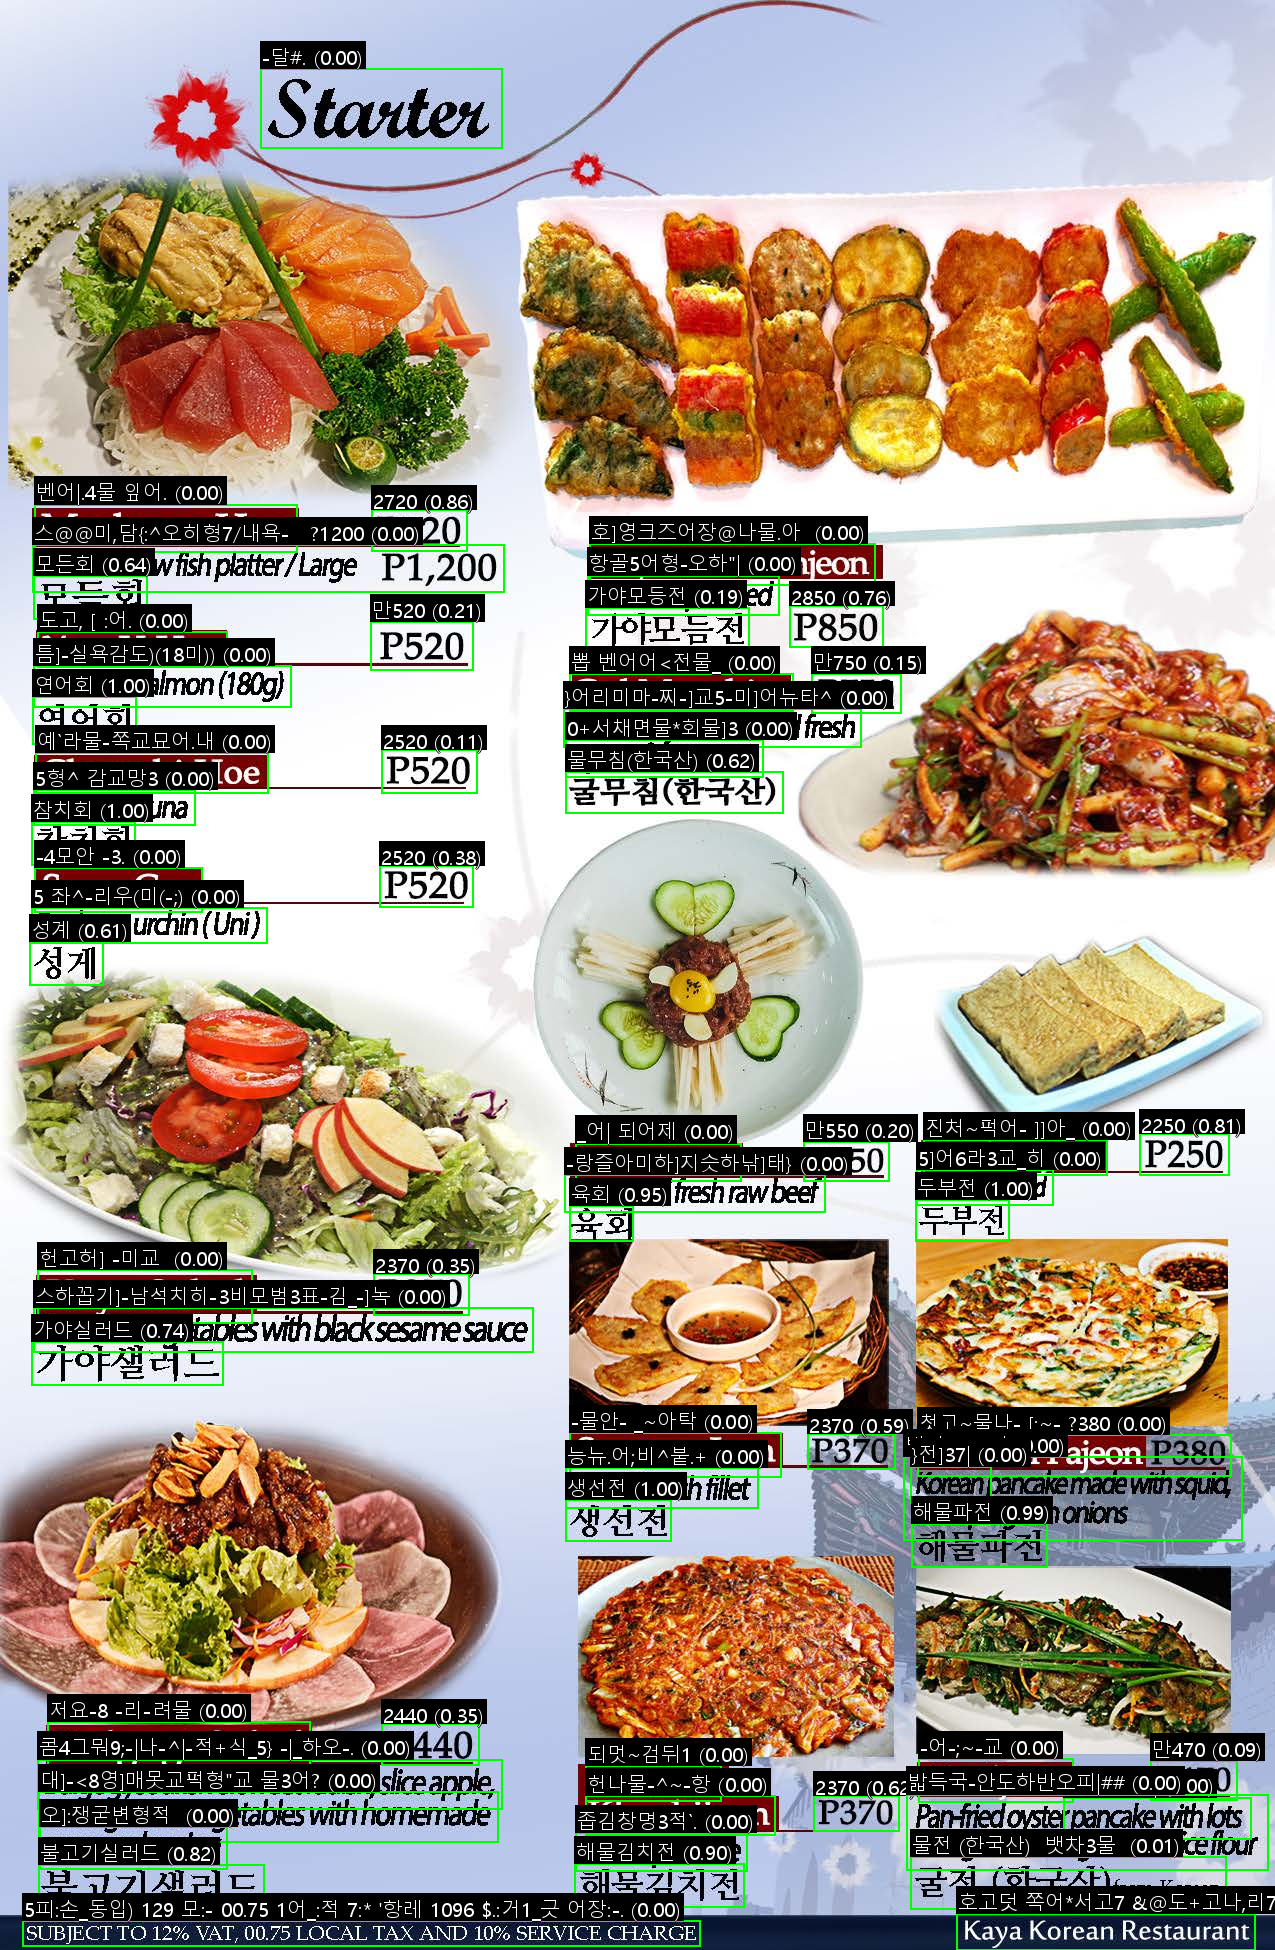

In [5]:
# ─────────────────────────────────────────────────────────────
# 1) 라이브러리 임포트
# ─────────────────────────────────────────────────────────────
import easyocr                     # OCR 엔진
import requests                    # URL에서 이미지 다운로드
import cv2                         # 이미지 디코딩·어노테이션
import numpy as np                 # 배열 처리
from PIL import Image, ImageDraw, ImageFont  # 이미지 변환 및 한글 텍스트 렌더링
import os

# ─────────────────────────────────────────────────────────────
# 2) EasyOCR 리더 초기화 및 이미지 불러오기
# ─────────────────────────────────────────────────────────────
reader = easyocr.Reader(['ko'], gpu=True)  # 한국어 모델, GPU 사용

# url      = 'https://primer.com.ph/food/wp-content/uploads/sites/4/2018/04/Kaya-Resto-Menu1.jpg'
# resp     = requests.get(url)
# img_data = np.frombuffer(resp.content, dtype=np.uint8)
# img      = cv2.imdecode(img_data, cv2.IMREAD_COLOR)  #OpenCV 인식을 위해 BGR 포맷으로 변환
img_path = "./image/Kaya-Resto-Menu1.jpg"                    # 로컬 이미지 파일 경로
img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # OpenCV로 BGR 포맷으로 이미지 로드

# ─────────────────────────────────────────────────────────────
# 3) OCR 수행
# ─────────────────────────────────────────────────────────────
results = reader.readtext(img)  # [(bbox, text, confidence), ...]

# ─────────────────────────────────────────────────────────────
# 4) BGR→RGB 변환 후 PIL 이미지로 변환
# ─────────────────────────────────────────────────────────────
annotated_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(annotated_rgb)

# ─────────────────────────────────────────────────────────────
# 5) PIL로 한글 텍스트가 깨지지 않게 그리기
# ─────────────────────────────────────────────────────────────
draw = ImageDraw.Draw(pil_img)

# 윈도우 기본 한글 폰트(맑은 고딕) 경로 설정
font_path = r"C:\Windows\Fonts\malgun.ttf"
# 텍스트 크기 설정 (bbox 높이에 맞춰 자동 조절해도 됩니다)
font_size = 20
font = ImageFont.truetype(font_path, font_size)

for bbox, text, prob in results:
    # bbox 네 꼭짓점 좌표 → 최소/최대값 계산
    xs = [int(pt[0]) for pt in bbox]
    ys = [int(pt[1]) for pt in bbox]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)

    # 1) 바운딩 박스 (녹색, OpenCV 대비 RGB 순서)
    draw.rectangle(
        [(x_min, y_min), (x_max, y_max)],
        outline=(0, 255, 0), width=2
    )

    # 2) 라벨 텍스트 및 배경
    print(f"{text}  (신뢰도: {prob:.2f})")
    label = f"{text} ({prob:.2f})"
    # draw.textbbox로 텍스트 크기 계산
    tb = draw.textbbox((0, 0), label, font=font)
    text_w, text_h = tb[2] - tb[0], tb[3] - tb[1]

    # 라벨 배경 (검은색 불투명)
    bg_top_left     = (x_min, y_min - text_h - 6)
    bg_bottom_right = (x_min + text_w + 4, y_min)
    draw.rectangle([bg_top_left, bg_bottom_right], fill=(0, 0, 0))

    # 3) 흰색 텍스트 (검은색 테두리 효과)
    text_x = x_min + 2
    text_y = y_min - text_h - 4
    # 테두리(외곽선) 그리기
    draw.text((text_x-1, text_y), label, font=font, fill=(0,0,0))
    draw.text((text_x+1, text_y), label, font=font, fill=(0,0,0))
    draw.text((text_x,   text_y-1), label, font=font, fill=(0,0,0))
    draw.text((text_x,   text_y+1), label, font=font, fill=(0,0,0))
    # 실제 텍스트
    draw.text((text_x, text_y), label, font=font, fill=(255,255,255))

# ─────────────────────────────────────────────────────────────
# 6) 결과 출력
# ─────────────────────────────────────────────────────────────
display(pil_img)